# Final Exam
Submitted by: Anthony Aromin

## Initial Setup

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [249]:
df = pd.read_csv('salary_dataset.csv')
df.head(5)

,Position,Annual Salary in Dollar,Date Hired
0,City Administrator,295000.0,2004.0
1,President,295000.0,2008.0
2,Superintendent Of Schools,275000.0,2007.0
3,Chief,230743.0,1990.0
4,Medical Officer Psych,206000.0,2008.0


In [250]:
df.columns = [
    'position',
    'annual_salary_usd',
    'date_hired'
]
df.head(5)

,position,annual_salary_usd,date_hired
0,City Administrator,295000.0,2004.0
1,President,295000.0,2008.0
2,Superintendent Of Schools,275000.0,2007.0
3,Chief,230743.0,1990.0
4,Medical Officer Psych,206000.0,2008.0


In [251]:
df.describe()

,annual_salary_usd,date_hired
count,11436.000000,11499.000000
mean,88115.911857,1996.429777
std,25166.209026,10.095155
min,7.000000,1955.000000
25%,78743.000000,1988.000000
50%,85606.000000,1998.000000
75%,97316.250000,2006.000000
max,295000.000000,2011.000000


## Data Cleaning

In [252]:
df.dropna(subset=[
    'position',
    'date_hired'
],inplace=True)

df.isnull().sum()

position              0
annual_salary_usd    64
date_hired            0
dtype: int64

In [253]:
df['date_hired'] = df['date_hired'].astype(int)

df.head(5)

,position,annual_salary_usd,date_hired
0,City Administrator,295000.0,2004
1,President,295000.0,2008
2,Superintendent Of Schools,275000.0,2007
3,Chief,230743.0,1990
4,Medical Officer Psych,206000.0,2008


In [254]:
temp_df = df
temp_grouped_df = df.groupby('position')['annual_salary_usd']

def fill_annual_salary_usd(x):
    if (np.isnan(x['annual_salary_usd']) or
        x['annual_salary_usd'] < 1_000.00):
        mean_salary = temp_grouped_df.get_group(x['position']).mean()

        # if mean salary of position is still NaN or way less than minimum wage
        # use mean salary of all positions instead.
        if (np.isnan(mean_salary) or
            mean_salary < 1_000.00):
            mean_salary = df['annual_salary_usd'].mean()

        return mean_salary
    else:
        return x['annual_salary_usd']

df['annual_salary_usd'] = temp_df.apply(fill_annual_salary_usd, axis=1)

print(df.isnull().sum())
print('-' * 50)
print(df.describe())

position             0
annual_salary_usd    0
date_hired           0
dtype: int64
--------------------------------------------------
       annual_salary_usd    date_hired
count       11498.000000  11498.000000
mean        91586.769790   1996.428596
std         18200.788921     10.094801
min         71796.000000   1955.000000
25%         78743.000000   1988.000000
50%         87987.000000   1998.000000
75%         97674.250000   2006.000000
max        295000.000000   2011.000000


## Additional Columns

In [255]:
df['annual_salary_php'] = df.apply(
    lambda x: x['annual_salary_usd'] * 50.0, axis=1
)

df.head(5)

,position,annual_salary_usd,date_hired,annual_salary_php
0,City Administrator,295000.0,2004,14750000.0
1,President,295000.0,2008,14750000.0
2,Superintendent Of Schools,275000.0,2007,13750000.0
3,Chief,230743.0,1990,11537150.0
4,Medical Officer Psych,206000.0,2008,10300000.0


In [256]:
df['monthly_salary_php'] = df.apply(
    lambda x: np.round(x['annual_salary_php'] / 12.0, 2), axis=1
)

df.head(5)

,position,annual_salary_usd,date_hired,annual_salary_php,monthly_salary_php
0,City Administrator,295000.0,2004,14750000.0,1229166.67
1,President,295000.0,2008,14750000.0,1229166.67
2,Superintendent Of Schools,275000.0,2007,13750000.0,1145833.33
3,Chief,230743.0,1990,11537150.0,961429.17
4,Medical Officer Psych,206000.0,2008,10300000.0,858333.33


In [257]:
df['years_exp'] = df.apply(
    lambda x: 2015 - x['date_hired'], axis = 1
)

df.head(5)

,position,annual_salary_usd,date_hired,annual_salary_php,monthly_salary_php,years_exp
0,City Administrator,295000.0,2004,14750000.0,1229166.67,11
1,President,295000.0,2008,14750000.0,1229166.67,7
2,Superintendent Of Schools,275000.0,2007,13750000.0,1145833.33,8
3,Chief,230743.0,1990,11537150.0,961429.17,25
4,Medical Officer Psych,206000.0,2008,10300000.0,858333.33,7


## Exporting the Dataset

In [258]:
temp_df = df.groupby('position')

temp_df['years_exp'].count().describe()

count    1646.000000
mean        6.985419
std        55.818037
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1874.000000
Name: years_exp, dtype: float64

In [269]:
out_df = temp_df.filter(lambda x: len(x) >= 10)

out_df.groupby('position')['years_exp'].count().describe()

count     127.000000
mean       70.740157
std       190.293350
min        10.000000
25%        14.000000
50%        24.000000
75%        51.000000
max      1874.000000
Name: years_exp, dtype: float64

In [270]:
out_df.to_csv('salary_dataset_cleaned.csv')

##  
---

## Reimporting the Dataset

In [271]:
exp_df = pd.read_csv('salary_dataset_cleaned.csv')
exp_df.head(5)

,Unnamed: 0,position,annual_salary_usd,date_hired,annual_salary_php,monthly_salary_php,years_exp
0,9,Workers Compensation Recipient,197808.0,1984,9890400.0,824200.00,31
1,12,Chief Of Staff,193125.0,2011,9656250.0,804687.50,4
2,13,Executive Director,193125.0,2007,9656250.0,804687.50,8
3,16,Executive Director,188692.0,2000,9434600.0,786216.67,15
4,17,Executive Director,188044.0,2006,9402200.0,783516.67,9


In [272]:
exp_df.drop([
    'Unnamed: 0',
    'annual_salary_usd',
    'date_hired',
    'annual_salary_php'
], axis=1, inplace=True)

exp_df.head(5)

,position,monthly_salary_php,years_exp
0,Workers Compensation Recipient,824200.00,31
1,Chief Of Staff,804687.50,4
2,Executive Director,804687.50,8
3,Executive Director,786216.67,15
4,Executive Director,783516.67,9


## Training

In [273]:
x = exp_df.drop('monthly_salary_php', axis=1)
y = exp_df['monthly_salary_php']

x = pd.get_dummies(x, drop_first=True)

In [274]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [275]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Testing

In [276]:
y_predict = model.predict(x_test)

In [277]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = r2_score(y_test, y_predict)

print(f'RMSE: ₱{rmse:.2f}')
print(f'R2: {r2:.2f}')

RMSE: ₱39834.03
R2: 0.63


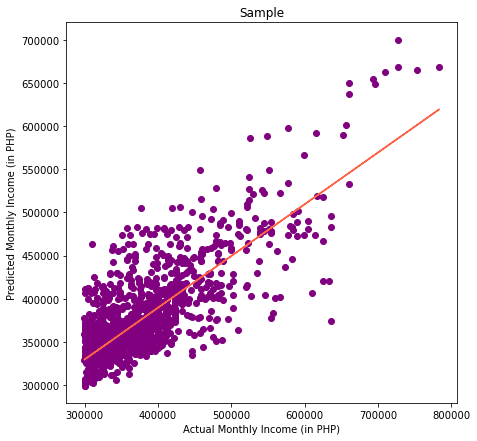

In [278]:
plt.figure(figsize=(7, 7))
plt.title('Sample')
plt.xlabel('Actual Monthly Income (in PHP)')
plt.ylabel('Predicted Monthly Income (in PHP)')

plt.scatter(y_test, y_predict, color='purple')

m, b = np.polyfit(y_test, y_predict, 1)
plt.plot(y_test, m * y_test + b, color='tomato')